In [1]:
!pip install transformers
import nltk
import pandas as pd
import numpy as np
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.4 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from transformers import AutoTokenizer,AutoModelForSequenceClassification
from scipy.special import softmax
from tqdm.notebook import tqdm

In [4]:
MODEL=f"nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

In [29]:
df=pd.read_csv("/content/drive/MyDrive/Youtube Project/IPL2018 - Commentary Data (2).csv")
df.dropna()
# df = df.head(100)
# df.head()

,over,short_text,long_text
0,18.3,"Brathwaite to Rayudu, FOUR runs",And Chennai Super Kings' highest run-scorer hi...
1,18.2,"Brathwaite to Rayudu, no run","full just outside off, and Rayudu suffles acro..."
2,18.1,"Brathwaite to Rayudu, no run","yorker on off, and dug away to the square-leg ..."
3,17.6,"Kaul to Watson, no run","full just outside off, and defended towards co..."
4,17.5,"Kaul to Watson, FOUR runs","full just outside off, and this time it's been..."
...,...,...,...
14084,0.5,"Chahar to Rohit Sharma, 1 run","full and veering into the pads, Rohit tucks it..."
14085,0.4,"Chahar to Rohit Sharma, FOUR runs","slightly overpitched and outside off, Rohit do..."
14086,0.3,"Chahar to Rohit Sharma, no run",beaten three times in a row! Good length and b...
14087,0.2,"Chahar to Rohit Sharma, no run","on a length and outside off, Chahar finds outs..."


In [13]:
def sentiment_score(commentary):
  tokens=tokenizer.encode(commentary,return_tensors='pt')
  result=model(tokens)
  return int(torch.argmax(result.logits))+1

In [14]:
import torch

In [18]:
df['long_text'][515]

'length ball just outside off, and punched to long on off the back foot. Just a single'

In [16]:
sentiment_score(df['long_text'].iloc[15])

1

In [30]:
null_values = df.isnull().sum()
null_values

over           0
short_text     0
long_text     36
dtype: int64

In [31]:
df['long_text'].fillna(method='ffill', inplace=True) #Filling the null values with the above comment

In [32]:
df['long_text'][1806]

'shot! Extremely full outside off, and Parthiv drills it through extra cover with exquisite timing'

In [33]:
null_values = df.isnull().sum()
null_values

over          0
short_text    0
long_text     0
dtype: int64

In [34]:
res=[]
for i,row in tqdm(df.iterrows(),total=len(df)):
  try:
    text=row['long_text']
    bert_result=sentiment_score(text)
    res.append(bert_result)
    #print(text)
    #print(res[i])
    #print(i)
    i=i+1
  except ValueError:
    print("broke")

  0%|          | 0/14089 [00:00<?, ?it/s]

In [35]:
res=np.array(res)
df['bert_results']=res
df['bert_results']

0        5
1        1
2        1
3        5
4        5
        ..
14084    1
14085    2
14086    1
14087    2
14088    2
Name: bert_results, Length: 14089, dtype: int64

In [36]:
res_li=list(res)

In [37]:
res_1=res_li.count(1)
res_1
res_2=res_li.count(2)
res_2
res_3=res_li.count(3)
res_3
res_4=res_li.count(4)
res_4
res_5=res_li.count(5)
res_5

1402

In [38]:
res_1

3766

In [39]:
res_2

5320

In [40]:
res_3

1723

In [41]:
res_4

1878

In [42]:
res_5

1402

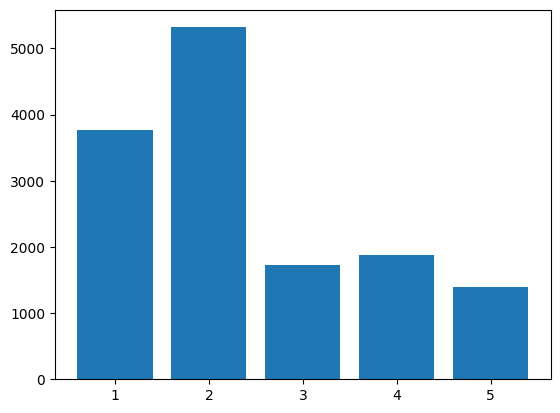

In [44]:
import matplotlib.pyplot as plt
x=[1,2,3,4,5]
y=[res_1,res_2,res_3,res_4,res_5]
plt.bar(x,y)
plt.show()

In [45]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split
import seaborn as sns

In [46]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


In [47]:
test_res = []
for i, row in test_df.iterrows():
    text = row['long_text']
    bert_result = sentiment_score(text)
    test_res.append(bert_result)
test_res = np.array(test_res)
test_df['bert_results_long'] = test_res

In [48]:
test_df['bert_results_long'].head()

7803     2
2993     1
3115     2
13089    3
795      3
Name: bert_results_long, dtype: int64

In [49]:
test_res = []
for i, row in test_df.iterrows():
    text = row['short_text']
    bert_result = sentiment_score(text)
    test_res.append(bert_result)
test_res = np.array(test_res)
test_df['bert_results_short'] = test_res

In [50]:
test_df['bert_results_short'].head()

7803     1
2993     1
3115     4
13089    1
795      1
Name: bert_results_short, dtype: int64

In [51]:
accuracy = accuracy_score(test_df['bert_results_short'], test_df['bert_results_long'])
accuracy

0.24911284599006386

In [52]:
precision = precision_score(test_df['bert_results_short'], test_df['bert_results_long'], average='weighted')
precision

0.6416243580193373

In [53]:
f1 = f1_score(test_df['bert_results_short'], test_df['bert_results_long'], average='weighted')
f1

0.3337644783983984

In [54]:
print(test_df['bert_results_short'].unique())

[1 4 5 2 3]


In [55]:
print(test_df['bert_results_long'].unique())

[2 1 3 5 4]


In [60]:
conf_matrix = confusion_matrix(test_df['bert_results_long'], test_df['bert_results_short'], labels=['1', '2', '3', '4', '5'])


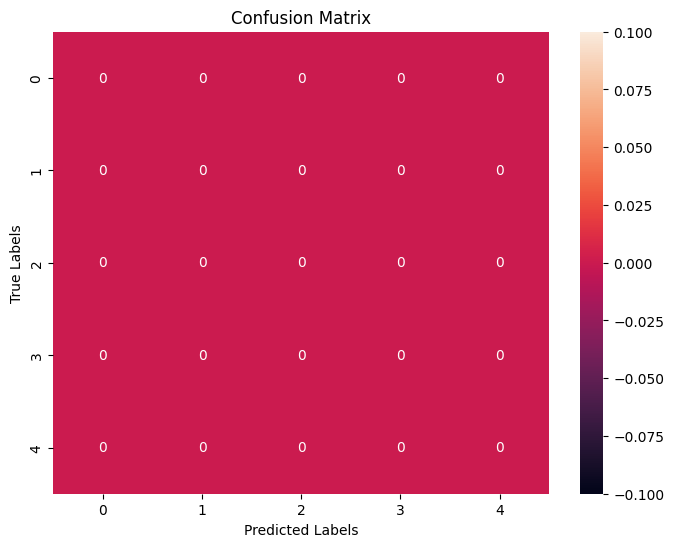

In [61]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [62]:
pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 1.9 MB/s eta 0:00:00


In [63]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# Load the GPT-3.5 model and tokenizer
gpt2_model_name = "gpt2"
gpt2_model = GPT2LMHeadModel.from_pretrained(gpt2_model_name)
gpt2_tokenizer = GPT2Tokenizer.from_pretrained(gpt2_model_name)
gpt2_model.config.pad_token_id = gpt2_tokenizer.eos_token_id


In [64]:
generated_comments = []
for i, row in test_df.iterrows():
    sentiment = row['bert_results']
    sentiment_label = "positive" if sentiment == 5 else "neutral" if sentiment == 3 else "negative"
    prompt = row['long_text']

    input_text = f"{sentiment_label.capitalize()} sentiment: {prompt}"
    input_ids = gpt2_tokenizer.encode(input_text, return_tensors="pt")

    attention_mask = torch.ones(input_ids.shape, dtype=torch.long)
    attention_mask[input_ids == gpt2_tokenizer.pad_token_id] = 0

    with torch.no_grad():
        output = gpt2_model.generate(input_ids, attention_mask=attention_mask, max_length=100, num_return_sequences=1, no_repeat_ngram_size=2)
    generated_commentary = gpt2_tokenizer.decode(output[0], skip_special_tokens=True)
    generated_comments.append(generated_commentary)

test_df['generated_comment'] = generated_comments

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1417: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation )
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1268: UserWarning: Input length of input_ids is 115, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1268: UserWarning: Input length of input_ids is 129, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py

In [66]:
len(test_df['generated_comment'])

2818

In [65]:
test_df['generated_comment']

7803     Negative sentiment: yorker length outside off,...
2993     Negative sentiment: fullish outside off, punch...
3115     Negative sentiment: slapped in the air, and ju...
13089    Neutral sentiment: slower ball on off, and Ran...
795      Neutral sentiment: wide of the crease, back of...
                               ...                        
9672     Negative sentiment: lower-arm slider this time...
3469     Negative sentiment: steps out and drills this ...
9246     Negative sentiment: driven through the line to...
8990     Negative sentiment: another one! Yet another o...
9015     Negative sentiment: strays down leg again, swe...
Name: generated_comment, Length: 2818, dtype: object